In [14]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
engine = create_engine("sqlite:///data/mta2.db")

In [39]:
all_tables = engine.table_names()
all_tables

<ipython-input-39-9dbbbb8bc6ba>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  all_tables = engine.table_names()


['turnstile_200104',
 'turnstile_200111',
 'turnstile_200118',
 'turnstile_200125',
 'turnstile_200201',
 'turnstile_200208',
 'turnstile_200215',
 'turnstile_200222',
 'turnstile_200229',
 'turnstile_200307',
 'turnstile_200314',
 'turnstile_200321',
 'turnstile_200328',
 'turnstile_200404',
 'turnstile_200411',
 'turnstile_200418',
 'turnstile_200425',
 'turnstile_200502',
 'turnstile_200509',
 'turnstile_200516',
 'turnstile_200523',
 'turnstile_200530',
 'turnstile_200606',
 'turnstile_200613',
 'turnstile_200620',
 'turnstile_200627',
 'turnstile_200704',
 'turnstile_200711',
 'turnstile_200718',
 'turnstile_200725',
 'turnstile_200801',
 'turnstile_200808',
 'turnstile_200815',
 'turnstile_200822',
 'turnstile_200829',
 'turnstile_200905',
 'turnstile_200912',
 'turnstile_200919',
 'turnstile_200926',
 'turnstile_201003',
 'turnstile_201010',
 'turnstile_201017',
 'turnstile_201024',
 'turnstile_201031',
 'turnstile_201107',
 'turnstile_201114',
 'turnstile_201121',
 'turnstile_2

In [40]:
week_list = []
for i in all_tables:
    week_list.append(i[-6:])

In [41]:
#SQL pull of data from local machine
def get_data_sql(week_nums):
    filename = "turnstile_{}"
    dfs = []
    for week_num in week_nums:
        file_url = filename.format(week_num)
        dfs.append(pd.read_sql('SELECT * FROM {};'.format(file_url) ,engine))
    return pd.concat(dfs)
        
mta = get_data_sql(week_list)
mta


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,03:00:00,REGULAR,7324295,2482512
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,07:00:00,REGULAR,7324305,2482523
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,11:00:00,REGULAR,7324371,2482594
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,15:00:00,REGULAR,7324587,2482647
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,19:00:00,REGULAR,7324963,2482713
...,...,...,...,...,...,...,...,...,...,...,...
207049,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/19/2021,05:00:00,REGULAR,5554,544
207050,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/19/2021,09:00:00,REGULAR,5554,544
207051,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/19/2021,13:00:00,REGULAR,5554,544
207052,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/19/2021,17:00:00,REGULAR,5554,544


In [6]:
# To pull the same MTA data from NYC website: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
#week_nums = [160903, 160910, 160917]
#turnstiles_df = get_data(week_nums)

In [42]:
mta 

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,03:00:00,REGULAR,7324295,2482512
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,07:00:00,REGULAR,7324305,2482523
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,11:00:00,REGULAR,7324371,2482594
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,15:00:00,REGULAR,7324587,2482647
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,19:00:00,REGULAR,7324963,2482713
...,...,...,...,...,...,...,...,...,...,...,...
207049,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/19/2021,05:00:00,REGULAR,5554,544
207050,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/19/2021,09:00:00,REGULAR,5554,544
207051,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/19/2021,13:00:00,REGULAR,5554,544
207052,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/19/2021,17:00:00,REGULAR,5554,544


In [43]:
mta.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,03:00:00,REGULAR,7324295,2482512
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,07:00:00,REGULAR,7324305,2482523
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,11:00:00,REGULAR,7324371,2482594
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,15:00:00,REGULAR,7324587,2482647
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,19:00:00,REGULAR,7324963,2482713


In [44]:
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [45]:
mta.shape

(13330595, 11)

In [46]:
mta.columns = mta.columns.str.strip() # clean up blank space in column headers, specifically EXITS
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [47]:
mta.dtypes 

C/A         object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISION    object
DATE        object
TIME        object
DESC        object
ENTRIES      int64
EXITS        int64
dtype: object

In [48]:
#Adjust data type on date and time / add column in case need to use separetly or as index
mta['DATETIME'] = pd.to_datetime(mta.DATE + ' ' + mta.TIME, format="%m/%d/%Y %H:%M:%S")
mta["DATE"] = pd.to_datetime(mta["DATE"])
mta["TIME"] = pd.to_datetime(mta["TIME"])


In [49]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13330595 entries, 0 to 207053
Data columns (total 12 columns):
 #   Column    Dtype         
---  ------    -----         
 0   C/A       object        
 1   UNIT      object        
 2   SCP       object        
 3   STATION   object        
 4   LINENAME  object        
 5   DIVISION  object        
 6   DATE      datetime64[ns]
 7   TIME      datetime64[ns]
 8   DESC      object        
 9   ENTRIES   int64         
 10  EXITS     int64         
 11  DATETIME  datetime64[ns]
dtypes: datetime64[ns](3), int64(2), object(7)
memory usage: 1.3+ GB


In [50]:
mta.shape

(13330595, 12)

In [51]:
#check values of the descripti
mta.DESC.value_counts()

REGULAR       13276552
RECOVR AUD       54043
Name: DESC, dtype: int64

In [52]:
#remove missed audit entries as we interested in the regular numbers for the turnstiles
dropaud = ['RECOVR AUD']
mta = mta.drop(mta[mta.DESC.isin(dropaud)].index)

In [53]:
#deleted number matches the 586 expected
mta.shape

(10368759, 12)

In [54]:
#Remove DESC from dataframe
mta = mta.drop(["DESC"], axis=1, errors="ignore")

In [55]:
#Bring in assembled Borough to station mapping, sense check mappings/dataframe
boroughs = pd.read_csv('Borough Mapping1.csv')
borcol = [0] #Columns to remove
boroughs.drop(boroughs.columns[borcol],axis = 1, inplace=True) 
boroughs

,STATION,BOROUGH
0,138/GRAND CONC,Bronx
1,149/GRAND CONC,Bronx
2,161/YANKEE STAD,Bronx
3,167 ST,Bronx
4,170 ST,Bronx
...,...,...
387,PATH WTC 2,Manhattan
388,PATH NEW WTC,Manhattan
389,BLEECKER ST,Manhattan
390,51 ST,Manhattan


In [57]:
#Explore Boroughs coming in appropriately
boroughs['BOROUGH'].unique()

array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island',
       'Newark', 'Harrison', 'Jersey City', 'Unknown', 'Hoboken'],
      dtype=object)

In [58]:
#Join columns on station for new column 'BOROUGH'
#cols = ['STATION']
#mta = mta.join(boroughs.set_index(cols), on=cols) 
mta = pd.merge(left=mta, right=boroughs, how='inner', left_on='STATION', right_on='STATION')

In [59]:
mta.shape
#rows are now higher as we have some station locations that have the same names in different boroughs

(11004997, 12)

In [60]:
## Split similar station names by line and link to appropriate borough
mta.loc[(mta['DIVISION'] == 'BMT') & (mta['STATION'] == '36 ST'), 'BOROUGH'] = 'Brooklyn'
mta.loc[(mta['DIVISION'] == 'IND') & (mta['STATION'] == '36 ST'), 'BOROUGH'] = 'Queens'
mta.loc[(mta['STATION'] == '77 ST') & (mta['DIVISION'] == 'IRT' ), 'BOROUGH'] = 'Manhattan'
mta.loc[(mta['STATION'] == '77 ST') & (mta['DIVISION'] == 'BMT' ), 'BOROUGH'] = 'Brooklyn'
mta.loc[(mta['STATION'] == 'FULTON ST') & (mta['DIVISION'] == 'IND' ), 'BOROUGH'] = 'Brooklyn'
mta.loc[(mta['STATION'] == 'FULTON ST') & (mta['DIVISION'] == 'BMT' ), 'BOROUGH'] = 'Manhattan'
mta.loc[(mta['STATION'] == 'FULTON ST') & (mta['DIVISION'] == 'IRT' ), 'BOROUGH'] = 'Manhattan'
mta.loc[(mta['STATION'] == '50 ST') & (mta['DIVISION'] == 'IND' ), 'BOROUGH'] = 'Manhattan'
mta.loc[(mta['STATION'] == '50 ST') & (mta['DIVISION'] == 'BMT' ), 'BOROUGH'] = 'Brooklyn'
mta.loc[(mta['STATION'] == '50 ST') & (mta['DIVISION'] == 'IRT' ), 'BOROUGH'] = 'Manhattan'
mta.loc[(mta['STATION'] == 'GRAND ST') & (mta['DIVISION'] == 'BMT' ), 'BOROUGH'] = 'Brooklyn'
mta.loc[(mta['STATION'] == 'GRAND ST') & (mta['DIVISION'] == 'IND' ), 'BOROUGH'] = 'Manhattan'
mta.loc[(mta['STATION'] == '79 ST') & (mta['DIVISION'] == 'BMT' ), 'BOROUGH'] = 'Brooklyn'
mta.loc[(mta['STATION'] == '79 ST') & (mta['DIVISION'] == 'IRT' ), 'BOROUGH'] = 'Manhattan'
mta.loc[(mta['STATION'] == 'PROSPECT AV') & (mta['DIVISION'] == 'BMT' ), 'BOROUGH'] = 'Brooklyn'
mta.loc[(mta['STATION'] == 'PROSPECT AV') & (mta['DIVISION'] == 'IRT' ), 'BOROUGH'] = 'Bronx'

In [61]:
mta = mta.drop_duplicates(keep ='first')

In [62]:
mta.shape

(10357701, 12)

In [63]:
mta.BOROUGH.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Newark', 'Harrison',
       'Jersey City', 'Unknown', 'Hoboken', 'Staten Island'], dtype=object)

In [64]:
#Check if any station mapped to null
mta1 = mta[mta.STATION.isnull()]
mta1

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATETIME,BOROUGH


In [65]:
mta.BOROUGH.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Newark', 'Harrison',
       'Jersey City', 'Unknown', 'Hoboken', 'Staten Island'], dtype=object)

In [66]:
#Remove New Jersey and others so only five Boroughs - Bronx, Brooklyn, Manhattan, Queens and Staten Island
borotogo = ['Newark', 'Harrison', 'Jersey City', 'Unknown', 'Hoboken']
mta = mta.drop(mta[mta.BOROUGH.isin(borotogo)].index)

In [67]:
mta.BOROUGH.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [68]:
mta.reset_index
mta

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATETIME,BOROUGH
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-28,2021-03-29 23:00:00,7325143,2482753,2019-12-28 23:00:00,Brooklyn
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-30,2021-03-29 11:00:00,7325902,2483207,2019-12-30 11:00:00,Brooklyn
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-30,2021-03-29 15:00:00,7326144,2483272,2019-12-30 15:00:00,Brooklyn
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-30,2021-03-29 19:00:00,7326696,2483343,2019-12-30 19:00:00,Brooklyn
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-31,2021-03-29 11:00:00,7327075,2483576,2019-12-31 11:00:00,Brooklyn
...,...,...,...,...,...,...,...,...,...,...,...,...
11004992,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-03-18,2021-03-29 09:00:00,5554,544,2021-03-18 09:00:00,Manhattan
11004993,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-03-18,2021-03-29 13:00:00,5554,544,2021-03-18 13:00:00,Manhattan
11004994,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-03-18,2021-03-29 17:00:00,5554,544,2021-03-18 17:00:00,Manhattan
11004995,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-03-18,2021-03-29 21:00:00,5554,544,2021-03-18 21:00:00,Manhattan


In [69]:
indv_turnstile = ((mta["C/A"] == "A002") &
        (mta["UNIT"] == "R051") & 
        (mta["SCP"] == "02-00-00") & 
        (mta["STATION"] == "59 ST"))

mta[indv_turnstile].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATETIME,BOROUGH
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-28,2021-03-29 23:00:00,7325143,2482753,2019-12-28 23:00:00,Brooklyn
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-30,2021-03-29 11:00:00,7325902,2483207,2019-12-30 11:00:00,Brooklyn
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-30,2021-03-29 15:00:00,7326144,2483272,2019-12-30 15:00:00,Brooklyn
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-30,2021-03-29 19:00:00,7326696,2483343,2019-12-30 19:00:00,Brooklyn
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-31,2021-03-29 11:00:00,7327075,2483576,2019-12-31 11:00:00,Brooklyn


In [72]:
# verify that "C/A", "UNIT", "SCP"(aka each turnstile), "STATION", "DATE_TIME" is unique 
(mta
 .groupby(["C/A", "UNIT", "SCP", "STATION",'DIVISION', "DATETIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DIVISION,DATETIME,ENTRIES
0,A002,R051,02-00-00,59 ST,BMT,2019-12-28 23:00:00,1
6541083,R160,R164,02-00-01,66 ST-LINCOLN,IRT,2020-05-29 05:00:00,1
6541085,R160,R164,02-00-01,66 ST-LINCOLN,IRT,2020-05-29 17:00:00,1
6541086,R160,R164,02-00-01,66 ST-LINCOLN,IRT,2020-05-29 21:00:00,1
6541087,R160,R164,02-00-01,66 ST-LINCOLN,IRT,2020-05-30 01:00:00,1


In [73]:
mta[["PREV_DATE", "PREV_ENTRIES"]] = (mta
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda x: x.shift(1)))
mta.head()

<ipython-input-73-5781c8debda2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mta[["PREV_DATE", "PREV_ENTRIES"]] = (mta


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATETIME,BOROUGH,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-28,2021-03-29 23:00:00,7325143,2482753,2019-12-28 23:00:00,Brooklyn,NaT,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-30,2021-03-29 11:00:00,7325902,2483207,2019-12-30 11:00:00,Brooklyn,2019-12-28,7325143.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-30,2021-03-29 15:00:00,7326144,2483272,2019-12-30 15:00:00,Brooklyn,2019-12-30,7325902.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-30,2021-03-29 19:00:00,7326696,2483343,2019-12-30 19:00:00,Brooklyn,2019-12-30,7326144.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-31,2021-03-29 11:00:00,7327075,2483576,2019-12-31 11:00:00,Brooklyn,2019-12-30,7326696.0


In [74]:
# Drop the rows for the earliest date
mta.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [75]:
#Check the values seem sensible, we see that we have negative values in the millions and maxs in the millions 
#For a station on a day this is possible, for an individual turnstile that seems unlikely
entry_check = mta['ENTRIES'] - mta["PREV_ENTRIES"]
entry_check.describe(percentiles = [.25, .5, .75])

count    9.806800e+06
mean     2.151943e+02
std      2.618534e+06
min     -1.895328e+09
25%      2.000000e+00
50%      1.900000e+01
75%      7.400000e+01
max      2.038596e+09
dtype: float64

In [76]:
#Show example of negative counts to see behavior
mta[mta["ENTRIES"] < mta["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATETIME,BOROUGH,PREV_DATE,PREV_ENTRIES
7996,A002,R051,02-06-00,59 ST,NQR456W,BMT,2020-02-13,2021-03-29 15:00:00,43,6,2020-02-13 15:00:00,Brooklyn,2020-02-13,83074.0
14581,R244,R050,00-06-00,59 ST,456NQRW,IRT,2020-03-15,2021-03-29 20:00:00,27,32,2020-03-15 20:00:00,Brooklyn,2020-01-27,2549195.0
47841,A002,R051,02-06-00,59 ST,NQR456W,BMT,2020-09-13,2021-03-29 04:00:00,27072,4054,2020-09-13 04:00:00,Brooklyn,2020-05-09,44341.0
69701,R245A,R051,01-00-02,59 ST,456NQRW,IRT,2020-12-13,2021-03-29 15:00:00,48,163,2020-12-13 15:00:00,Brooklyn,2020-12-13,643257.0
75876,R245,R051,00-00-00,59 ST,456NQRW,IRT,2021-01-15,2021-03-29 15:00:00,47,21,2021-01-15 15:00:00,Brooklyn,2021-01-15,261148.0


In [77]:
# Focusing in on first example of reverse counter on 57th
reverse = ((mta["C/A"] == "A011") & 
(mta["UNIT"] == "R080") & 
(mta["SCP"] == "01-03-00") & 
(mta["STATION"] == "57 ST-7 AV") &
(mta["DATETIME"].dt.date == dt.datetime(2019, 12, 28).date()))
mta[reverse].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATETIME,BOROUGH,PREV_DATE,PREV_ENTRIES
119228,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,2019-12-28,2021-03-29 07:00:00,885744803,490072908,2019-12-28 07:00:00,Manhattan,2019-12-28,885744812.0
119229,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,2019-12-28,2021-03-29 11:00:00,885744741,490072574,2019-12-28 11:00:00,Manhattan,2019-12-28,885744803.0
119230,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,2019-12-28,2021-03-29 19:00:00,885744484,490071681,2019-12-28 19:00:00,Manhattan,2019-12-28,885744741.0
119231,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,2019-12-28,2021-03-29 23:00:00,885744360,490071407,2019-12-28 23:00:00,Manhattan,2019-12-28,885744484.0


In [78]:
# Looking at all stations with this counting issue
(mta[mta["ENTRIES"] < mta["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A    UNIT  SCP       STATION        
A002   R051  02-06-00  59 ST                 2
A006   R079  00-00-04  5 AV/59 ST            1
             00-03-00  5 AV/59 ST            1
A007   R079  01-06-03  5 AV/59 ST            1
A011   R080  01-03-00  57 ST-7 AV         2408
                                          ... 
R728   R226  00-00-00  GUN HILL RD           1
             00-00-01  GUN HILL RD           1
R729   R292  00-00-01  BAYCHESTER AV         2
R730   R431  00-00-04  EASTCHSTER/DYRE    1973
TRAM1  R468  00-00-01  RIT-MANHATTAN         1
Length: 718, dtype: int64

In [79]:
#We need to remove or adjust negative counters and strip the unrealistic outliers
#one way to do this is to simply take the absolute value of a counter thats negative and assume thats as the count

# First - Negative counts - we take care of negatives by taking the asbolute value and assume they're positive
mta1 = mta.copy(deep='False')
mta1['VOL'] = abs(mta1["ENTRIES"] - mta1["PREV_ENTRIES"])

#Second - Outlier - We isolate a turnstile/station level and use 4 standard devations (99.7% results), anything outside this is dropped
mta1 = mta1[mta1.groupby(["C/A", "UNIT", "SCP", "STATION"])['VOL']
            .apply(lambda vol: (np.abs(vol - vol.mean())/ vol.std()) < 4)]

mta1['VOL'].describe()

count    9.301913e+06
mean     7.736584e+01
std      8.907424e+03
min      0.000000e+00
25%      3.000000e+00
50%      2.200000e+01
75%      7.700000e+01
max      2.191430e+07
Name: VOL, dtype: float64

In [80]:
mta1.shape

(9301913, 15)

In [81]:
#create a function to deal with reverse counting
#given there are 84,600 seconds in a day 4 people/sec/turnstile averaged across 24 hours puts a limit at ~350k 
#anything above this 350,000 we will throw out as an outlier
def daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        #if coutner is reversed
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

mta["DAILY_ENTRIES"] = mta.apply(daily_counts, axis=1, max_counter=350000)

524289 153.0
27 2549195.0
48 643257.0
60 9438081.0
4 7832211.0
22 7896783.0
9 1562921352.0
52586 17116894.0
5 3055293.0
139 528152.0
524295 120318011.0
262147 8863085.0
32 597819.0
458780 85175465.0
261 9753069.0
1254421107 28554762.0
30 1254425410.0
2200 3324824.0
329 16348181.0
16 6566970.0
28448967 5274455.0
5276291 28448967.0
28135572 13797098.0
13799444 28135572.0
16141430 14847478.0
14849611 16141430.0
67822764 11523931.0
11525743 67822764.0
5554054 15517522.0
15519132 5554054.0
111922 2341748.0
2341818 111922.0
5181972 1987319.0
1987403 5181972.0
1007893 35560.0
35742 1007893.0
2018063 3207658.0
3208019 2018063.0
723171 4575435.0
4575965 723171.0
568283 142288.0
143737 568283.0
83 12445710.0
117 1237351900.0
720906 80270.0
25 11715484.0
17 3109024.0
137 6289129.0
109 2087362.0
179 5182776.0
270532634 536177.0
66 398919.0
589827 75.0
22 7149183.0
720921 6946581.0
16 5102094.0
160 11567738.0
200092 7980390.0
7980449 200092.0
10101246 15445501.0
15445554 10101246.0
7049466 128853.0

154 16283709.0
103 2844722.0
3 4008525.0
592408 4715178.0
524516 64642.0
36 352594526.0
1308988150 89033627.0
53100756 704878497.0
1895422953 110089090.0
5 1895327592.0
738431428 53263468.0
53237492 738434642.0
131135 118174528.0
532 10583445.0
555290572 421603550.0
8 13681629.0
646 1614828.0
524397 135382887.0
720897 117445468.0
0 524291.0
671112280 2664539.0
22 5621555.0
24 3242985.0
50 5698151.0
51 2944820.0
51627564 318991258.0
620759226 2471176.0
184 3201434.0
10 1349742.0
196613 917691.0
1006685084 3932619.0
7 1536055.0
17 4625551.0
33 1776715.0
27 592309.0
386 5358660.0
1245276 40701.0
39 2447718.0
245576 2525940.0
2526452 247166.0
1774017 4513916.0
4514240 1775604.0
3237530 931289.0
931712 3238804.0
11004046 115050.0
115671 11006241.0
12337064 161270.0
162927 12340260.0
2246921 348888.0
351262 2251707.0
173 13908992.0
1703967 17387249.0
18 3083086.0
84 1543753.0
4 1278035.0
52 5711068.0
28 14787119.0
23 584960.0
14 825714.0
823394345 34982.0
524288 41914.0
589824 33239.0
434 25

In [166]:
#We have less data rows elimiated using this methodology vs statistical
mta.shape

(9806800, 15)

In [167]:
mta

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATETIME,BOROUGH,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-30,2021-03-29 11:00:00,7325902,2483207,2019-12-30 11:00:00,Brooklyn,2019-12-28,7325143.0,759.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-30,2021-03-29 15:00:00,7326144,2483272,2019-12-30 15:00:00,Brooklyn,2019-12-30,7325902.0,242.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-30,2021-03-29 19:00:00,7326696,2483343,2019-12-30 19:00:00,Brooklyn,2019-12-30,7326144.0,552.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-31,2021-03-29 11:00:00,7327075,2483576,2019-12-31 11:00:00,Brooklyn,2019-12-30,7326696.0,379.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-31,2021-03-29 15:00:00,7327375,2483648,2019-12-31 15:00:00,Brooklyn,2019-12-31,7327075.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11004992,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-03-18,2021-03-29 09:00:00,5554,544,2021-03-18 09:00:00,Manhattan,2021-03-18,5554.0,0.0
11004993,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-03-18,2021-03-29 13:00:00,5554,544,2021-03-18 13:00:00,Manhattan,2021-03-18,5554.0,0.0
11004994,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-03-18,2021-03-29 17:00:00,5554,544,2021-03-18 17:00:00,Manhattan,2021-03-18,5554.0,0.0
11004995,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-03-18,2021-03-29 21:00:00,5554,544,2021-03-18 21:00:00,Manhattan,2021-03-18,5554.0,0.0


In [83]:
#Max for function method at right at our 350k mark and the quartiles and mean are in the ball park vs our prior method
#standard deviation higher as more inclusive to outlier days
mta['DAILY_ENTRIES'].describe()

count    9.806800e+06
mean     8.237174e+01
std      1.116264e+03
min      0.000000e+00
25%      2.000000e+00
50%      2.000000e+01
75%      7.500000e+01
max      3.493180e+05
Name: DAILY_ENTRIES, dtype: float64

In [208]:
#Create station totals, accumulating turnstiles up to station and putting a date against it
turnstile_station_daily = mta.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
turnstile_station_daily.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,2019-12-28,1120.0
1,A002,R051,59 ST,2019-12-29,3995.0
2,A002,R051,59 ST,2019-12-30,12960.0
3,A002,R051,59 ST,2019-12-31,10063.0
4,A002,R051,59 ST,2020-01-01,4884.0


In [147]:
#We appear to still have a max of just under 350,000 for a particular turnstile, double checking if it is an outlier
turnstile_station_daily.sort_values(['DAILY_ENTRIES'], ascending = False).head(25)

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
118549,N128,R200,EUCLID AV,2020-09-08,2718792.0
196622,PTH17,R541,THIRTY THIRD ST,2021-01-08,914800.0
194624,PTH09,R548,CHRISTOPHER ST,2020-06-16,898099.0
294498,R510,R090,39 AV,2020-01-07,874421.0
196401,PTH17,R541,THIRTY THIRD ST,2020-06-01,664829.0
232450,R194,R040,231 ST,2020-01-21,663016.0
168356,N507,R023,34 ST-HERALD SQ,2020-03-04,595076.0
195361,PTH11,R545,14TH STREET,2020-01-09,556631.0
294499,R510,R090,39 AV,2020-01-08,539320.0
212290,R132,R190,23 ST,2021-03-15,516089.0


In [145]:
#Let's checking Euclid Av's normal day to see if this makes sense for one turnstile
euclid = mta.groupby(["C/A", "UNIT", "SCP", "STATION","DATE"],as_index=False).DAILY_ENTRIES.first()
euclid_av = euclid.loc[euclid["STATION"] == "EUCLID AV"] 
euclid_av.sort_values("DAILY_ENTRIES", ascending=False)

,C/A,UNIT,SCP,STATION,DATE,DAILY_ENTRIES
675461,N128,R200,00-00-00,EUCLID AV,2020-09-09,338377.0
676299,N128,R200,00-00-02,EUCLID AV,2020-09-09,49733.0
677348,N128,R200,00-00-05,EUCLID AV,2020-01-18,7044.0
676924,N128,R200,00-00-04,EUCLID AV,2020-01-18,5166.0
676140,N128,R200,00-00-02,EUCLID AV,2020-03-11,3826.0
...,...,...,...,...,...,...
678026,N128,R200,00-05-00,EUCLID AV,2020-09-28,0.0
678027,N128,R200,00-05-00,EUCLID AV,2020-09-29,0.0
678028,N128,R200,00-05-00,EUCLID AV,2020-09-30,0.0
678029,N128,R200,00-05-00,EUCLID AV,2020-10-01,0.0


In [ ]:
turnstile_station_daily.sort_values(['DAILY_ENTRIES'], ascending = False)

In [ ]:
borough_daily = mta.groupby(['BOROUGH','DATE']).agg({'DAILY_ENTRIES': 'sum'}).sort_values(['DAILY_ENTRIES','DATE'], ascending=False).reset_index()
borough_daily

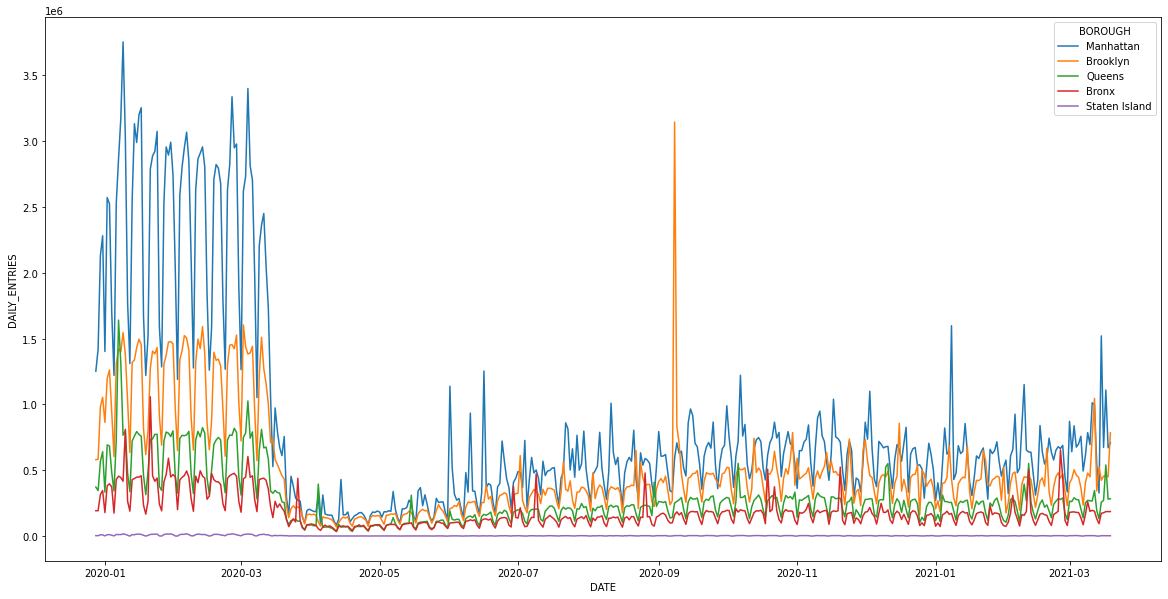

In [146]:
#Let's plot the general Borough trends to see if this Euclid item is impacting data
fig, axs = plt.subplots(figsize=[20, 10])

boroughs_first_look = sns.lineplot(x = "DATE",
                                     y = "DAILY_ENTRIES",
                                     hue = "BOROUGH",
                                     data = borough_daily)


In [162]:
#It appears that the September 9th data on Euclid (Brooklyn) is a significant outlier as its one day total is near yearly volume
#appears average for the station including the large number is 300 a day and closer to less than 100 people
euclid_stat = mta.loc[mta["STATION"] == "EUCLID AV"]
euclid_stat.describe()

,ENTRIES,EXITS,PREV_ENTRIES,DAILY_ENTRIES
count,1.711100e+04,1.711100e+04,1.711100e+04,17111.000000
mean,2.662765e+06,1.037851e+06,2.662655e+06,291.435451
std,7.033347e+06,6.530862e+06,7.033332e+06,7391.088776
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4.587520e+05,6.900000e+01,4.587520e+05,0.000000
50%,1.086390e+06,3.073780e+05,1.086383e+06,60.000000
75%,3.178860e+06,9.338855e+05,3.178472e+06,145.000000
max,5.898653e+08,5.887180e+08,5.898653e+08,338377.000000


In [174]:
#focusing in on the date and turnstile at issue
sep9_euclid = mta.loc[(mta["STATION"] == "EUCLID AV") & (mta["DATE"] > "2020-9-06") & (mta["DATE"] < "2020-9-10")]
sep9_euclid.loc[(sep9_euclid['C/A'] == 'N128') & (sep9_euclid['UNIT'] == 'R200') & (sep9_euclid['SCP'] == '00-00-00')].sort_values('DATE')


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATETIME,BOROUGH,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
5754200,N128,R200,00-00-00,EUCLID AV,AC,IND,2020-09-07,2021-03-29 00:00:00,1235376,357789,2020-09-07 00:00:00,Brooklyn,2020-09-06,1235366.0,10.0
5754201,N128,R200,00-00-00,EUCLID AV,AC,IND,2020-09-07,2021-03-29 04:00:00,1235376,357794,2020-09-07 04:00:00,Brooklyn,2020-09-07,1235376.0,0.0
5754202,N128,R200,00-00-00,EUCLID AV,AC,IND,2020-09-07,2021-03-29 08:00:00,1235394,357815,2020-09-07 08:00:00,Brooklyn,2020-09-07,1235376.0,18.0
5754203,N128,R200,00-00-00,EUCLID AV,AC,IND,2020-09-07,2021-03-29 12:00:00,1235423,357853,2020-09-07 12:00:00,Brooklyn,2020-09-07,1235394.0,29.0
5754204,N128,R200,00-00-00,EUCLID AV,AC,IND,2020-09-07,2021-03-29 16:00:00,1235482,357900,2020-09-07 16:00:00,Brooklyn,2020-09-07,1235423.0,59.0
5754205,N128,R200,00-00-00,EUCLID AV,AC,IND,2020-09-07,2021-03-29 20:00:00,1235539,357964,2020-09-07 20:00:00,Brooklyn,2020-09-07,1235482.0,57.0
5754215,N128,R200,00-00-00,EUCLID AV,AC,IND,2020-09-08,2021-03-29 21:00:00,338377,48857,2020-09-08 21:00:00,Brooklyn,2020-09-08,1236003.0,338377.0
5754214,N128,R200,00-00-00,EUCLID AV,AC,IND,2020-09-08,2021-03-29 20:00:00,1236003,358223,2020-09-08 20:00:00,Brooklyn,2020-09-08,338297.0,338297.0
5754213,N128,R200,00-00-00,EUCLID AV,AC,IND,2020-09-08,2021-03-29 17:00:00,338297,48852,2020-09-08 17:00:00,Brooklyn,2020-09-08,1235952.0,338297.0
5754212,N128,R200,00-00-00,EUCLID AV,AC,IND,2020-09-08,2021-03-29 16:00:00,1235952,358143,2020-09-08 16:00:00,Brooklyn,2020-09-08,338295.0,338295.0


In [206]:
#the Problem with the 8th varying at time stamps, only ~20 people entered the problematic turnstile that day, so we will drop that specific instance
euclid_mask = mta.loc[(mta["STATION"] == "EUCLID AV") & (mta["DATE"] == "2020-9-08") & (mta['C/A'] == 'N128') & (mta['UNIT'] == 'R200') & (mta['SCP'] == '00-00-00')].index
mta.drop(euclid_mask, inplace = True)


In [213]:
#Update previous group by functions
turnstile_station_daily = mta.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()

station_daily = mta.groupby(["BOROUGH", 'STATION',"DATE"])[['DAILY_ENTRIES']].sum().reset_index()

borough_daily = mta.groupby(['BOROUGH','DATE']).agg({'DAILY_ENTRIES': 'sum'}).sort_values(['DAILY_ENTRIES','DATE'], ascending=False).reset_index()


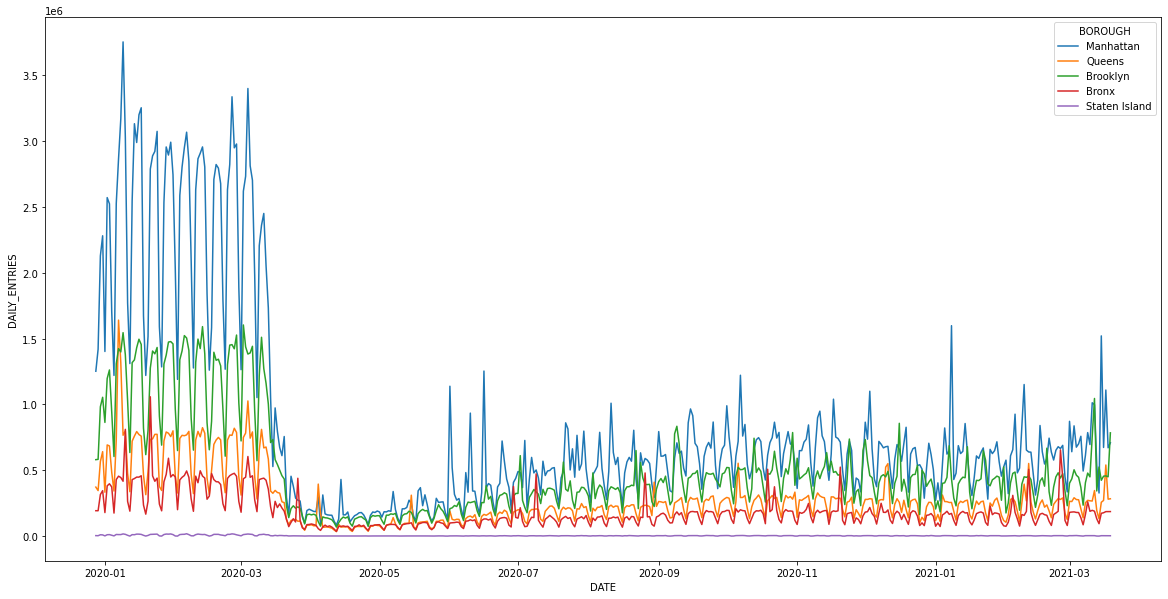

In [212]:
#Let's plot the general Borough trends to see if this Euclid item is impacting data
fig, axs = plt.subplots(figsize=[20, 10])

boroughs_first_look = sns.lineplot(x = "DATE",
                                     y = "DAILY_ENTRIES",
                                     hue = "BOROUGH",
                                     data = borough_daily)


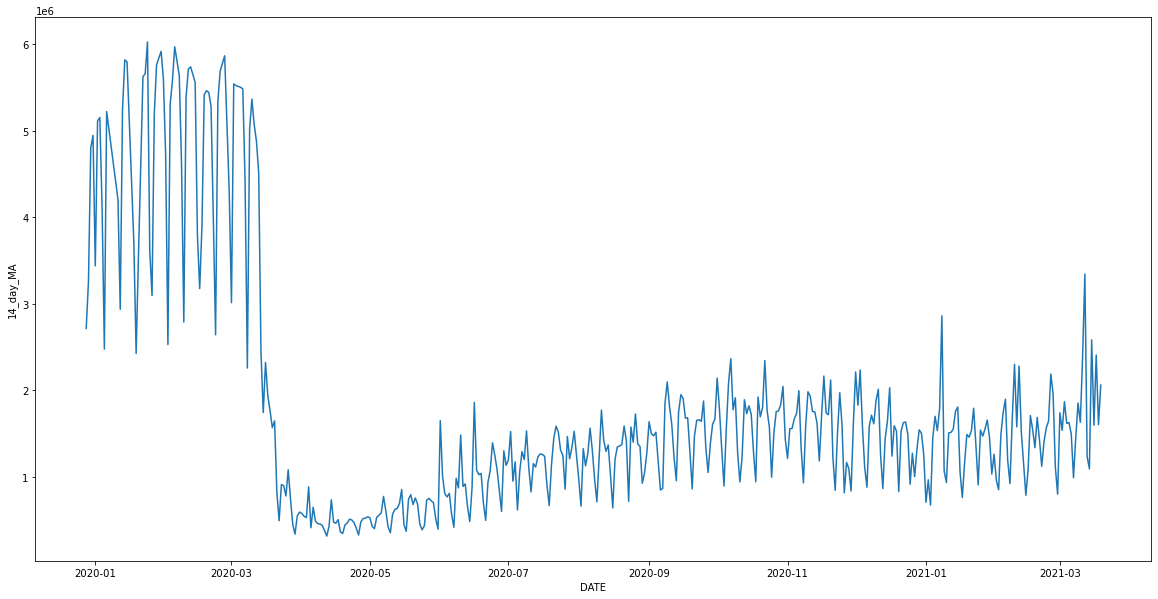

In [227]:
nyc_daily = mta.groupby(['DATE']).agg({'DAILY_ENTRIES': 'sum'}).sort_values(['DAILY_ENTRIES','DATE'], ascending=False).reset_index()
nyc_daily['14_day_MA'] = nyc_daily['DAILY_ENTRIES'].rolling(window=14).mean()

fig, axs = plt.subplots(figsize=[20, 10])

boroughs_first_look = sns.lineplot(x = "DATE",
                                     y = "14_day_MA",
                                     data = nyc_daily)

In [242]:
man_tot = borough_daily[borough_daily['BOROUGH'] == 'Manhattan'].reset_index()
man_win_2020 = man_tot.loc[man_tot['DATE'] < '2020-3-15']
man_spr_2020 = man_tot.loc[(man_tot['DATE'] > '2020-3-15') & (man_tot['DATE'] < '2020-6-15')]
man_sum_2020 = man_tot.loc[(man_tot['DATE'] > '2020-6-15') & (man_tot['DATE'] < '2020-9-15')]
man_fall_2020 = man_tot.loc[(man_tot['DATE'] > '2020-9-15') & (man_tot['DATE'] < '2020-12-15')]
man_win_2021 = man_tot.loc[(man_tot['DATE'] > '2020-12-15')]

SyntaxError: invalid syntax (<ipython-input-242-71066a423d47>, line 2)

In [250]:
t1 = man_tot['DATE'].between('2019-01-01','2020-03-15')
t2 = man_tot['DATE'].between('2020-03-16','2020-06-15')
t3 = man_tot['DATE'].between('2020-06-16','2020-09-15')
t4 = man_tot['DATE'].between('2020-09-16','2020-12-15')
t5 = man_tot['DATE'].between('2020-12-16','2021-03-25')
man_tot['SEASON'] = np.select([t1, t2,t3,t4,t5], ['man_win_2020','man_spr_2020','man_sum_2020','man_fall_2020','man_win_2021'])
    

In [258]:
man_tot.sort_values('DATE',inplace= True)

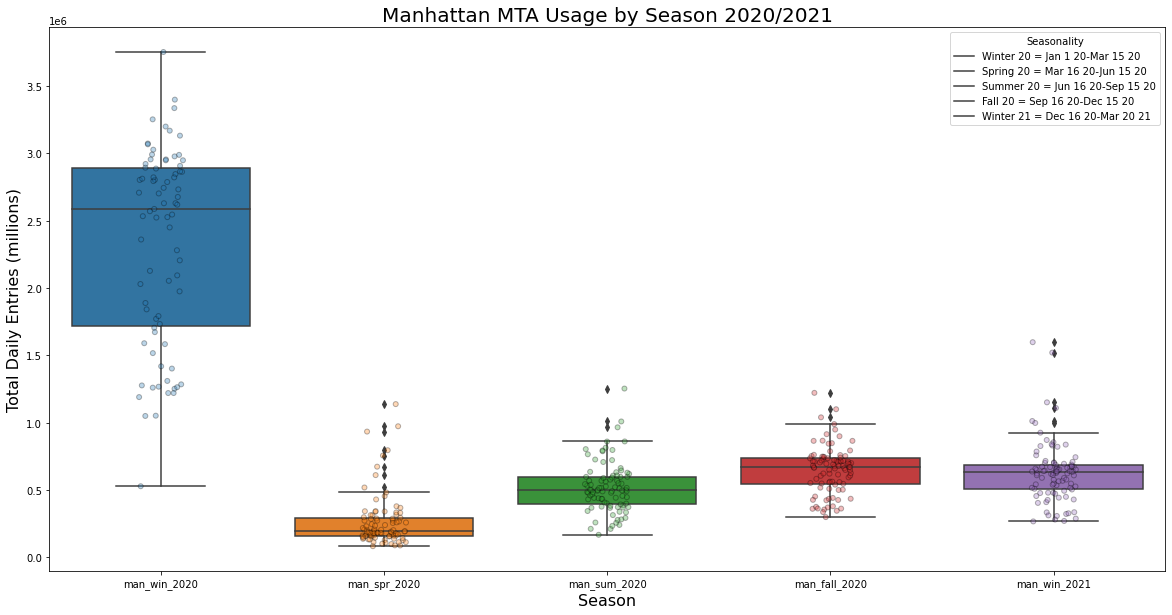

In [306]:
fig, axs = plt.subplots(figsize=[20, 10])

boxplot = sns.boxplot(x=man_tot['SEASON'], y=man_tot['DAILY_ENTRIES'])
boxplot = sns.stripplot(x=man_tot['SEASON'], y=man_tot['DAILY_ENTRIES'], data=pd.melt(man_tot), marker="o", alpha=0.3,jitter=True,
dodge=True,linewidth=1,edgecolor='black')
boxplot.axes.set_title("Manhattan MTA Usage by Season 2020/2021", fontsize=20)
boxplot.set_xlabel("Season", fontsize=16)
boxplot.set_ylabel("Total Daily Entries (millions)", fontsize=16)
legend_label = ["Winter 20 = Jan 1 20-Mar 15 20", "Spring 20 = Mar 16 20-Jun 15 20", "Summer 20 = Jun 16 20-Sep 15 20", "Fall 20 = Sep 16 20-Dec 15 20", "Winter 21 = Dec 16 20-Mar 20 21"]
boxplot.legend(legend_label,title="Seasonality")



plt.show() 

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd29091cca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd28e285370>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd29091c970>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd28e2859d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd28e285d00>,
 'means': []}

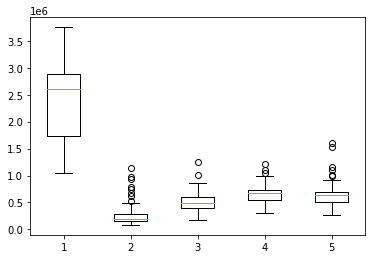

In [232]:
plt.boxplot((man_win_2020['DAILY_ENTRIES'],man_spr_2020['DAILY_ENTRIES'],man_sum_2020['DAILY_ENTRIES'],man_fall_2020['DAILY_ENTRIES'],man_win_2021['DAILY_ENTRIES']))
#day = man_tot
#sns.boxplot(x=DMC, y=day)
#plt.show()

In [ ]:
man_tot  = borough_daily[borough_daily['BOROUGH'] == 'Manhattan']

In [ ]:
manhattan

In [ ]:
man_win_2020 = mta_tot.loc[(mta_tot['BOROUGH'] == 'Manhattan') & (mta_tot['DATE'] < '2020-3-15')]
man_spr_2020 = mta_tot.loc[(mta_tot['BOROUGH'] == 'Manhattan') & (mta_tot['DATE'] > '2020-3-15') & (mta_tot['DATE'] < '2020-6-15')]
man_sum_2020 = mta_tot.loc[(mta_tot['BOROUGH'] == 'Manhattan') & (mta_tot['DATE'] > '2020-6-15') & (mta_tot['DATE'] < '2020-9-15')]
man_fall_2020 = mta_tot.loc[(mta_tot['BOROUGH'] == 'Manhattan') & (mta_tot['DATE'] > '2020-9-15') & (mta_tot['DATE'] < '2020-12-15')]
man_win_2021 = mta_tot.loc[(mta_tot['BOROUGH'] == 'Manhattan') & (mta_tot['DATE'] > '2020-12-15')]



In [ ]:
plt.boxplot((man_win_2020['DAILY_ENTRIES'],man_spr_2020['DAILY_ENTRIES'],man_sum_2020['DAILY_ENTRIES'],man_fall_2020['DAILY_ENTRIES'],man_win_2021['DAILY_ENTRIES']))



In [ ]:
j = manhattan.groupby(['STATION']).agg({'DAILY_ENTRIES': 'sum'}).sort_values(['DAILY_ENTRIES',], ascending=False).reset_index()
k = j[:3]
n = list(k['STATION'])
L =  manhattan[manhattan['STATION'].isin(n)]
L

In [ ]:
fig, axs = plt.subplots(figsize=[20, 10])

boroughs_2020_7MA = sns.lineplot(x = "DATE",
                                     y = "DAILY_ENTRIES",
                                     hue = "STATION",
                                     data = L)

In [233]:
covid = pd.read_csv('CovidData.csv')
covcol = [0] #Columns to remove
covid.drop(covid.columns[covcol],axis = 1, inplace=True) 
covid["DATE"] = pd.to_datetime(covid["DATE"])

In [234]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1940 entries, 0 to 1939
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     1940 non-null   datetime64[ns]
 1   CASES    1940 non-null   int64         
 2   BOROUGH  1940 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 45.6+ KB


In [235]:
mta2 = borough_daily.copy(deep=False)

In [236]:
mta2.shape

(2240, 3)

In [237]:
mta3 = pd.merge(mta2, covid,  how='left', left_on=['BOROUGH','DATE'], right_on = ['BOROUGH','DATE'])

In [238]:
mta3

,BOROUGH,DATE,DAILY_ENTRIES,CASES
0,Manhattan,2020-01-09,3752362.0,NaN
1,Manhattan,2020-03-04,3398638.0,2.0
2,Manhattan,2020-02-26,3335834.0,NaN
3,Manhattan,2020-01-17,3252368.0,NaN
4,Manhattan,2020-01-16,3198878.0,NaN
...,...,...,...,...
2235,Staten Island,2020-01-12,21.0,NaN
2236,Staten Island,2020-10-25,20.0,32.0
2237,Staten Island,2020-02-02,19.0,NaN
2238,Staten Island,2020-09-27,12.0,28.0


In [ ]:
mta4 = 